In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('aug_train.csv')
data_df = data_df[0:1000].copy()
data = data_df.copy()

In [4]:
data.shape

(1000, 14)

In [5]:
display(data_df.head())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#Dropping the columns which are not very useful and not having reasonable relation with the required analysis

In [7]:
data_df.drop(['enrollee_id'],axis=1,inplace=True)
data_df.drop(['city'],axis=1,inplace=True)
data_df.drop(['company_size'],axis=1,inplace=True)
data_df.drop(['last_new_job'],axis=1,inplace=True)

In [ ]:
#Missing Value Analysis

In [8]:
data_df.isnull().sum()

city_development_index      0
gender                    231
relevent_experience         0
enrolled_university        27
education_level            28
major_discipline          151
experience                  2
company_type              310
training_hours              0
target                      0
dtype: int64

In [9]:
data_df.isnull().mean()

city_development_index    0.000
gender                    0.231
relevent_experience       0.000
enrolled_university       0.027
education_level           0.028
major_discipline          0.151
experience                0.002
company_type              0.310
training_hours            0.000
target                    0.000
dtype: float64

In [ ]:
#From above, we can clearly states that only 4 components have been properly filled by the candidates out of 10, whereas 6 are having null or missing values. Company_type is having highest null values 32% (approx) followed by gender 23% (approx).

In [ ]:
#Visualisation and Missing Values Treatment
#In this section,

#First, we will verify the data through visualization to observe and identify any possible pattern in the data,
#Second, we will treat the missing values to complete the data, by replacing the null values with the highest number of component available in the column.
#Third, we will encode the data by using get_dummies() method
#and last, we will use dropping features for all those components which are relatively less significant for the analysis.

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

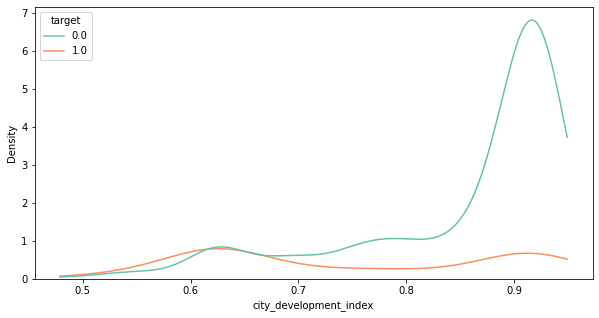

In [14]:
#a) city_development_index
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data_df, x="city_development_index", hue="target",cut = 0,palette='Set2')


In [15]:
#From this graph, we can observe that persons who live in developed cities have a lower likelihood of changing occupations.

C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

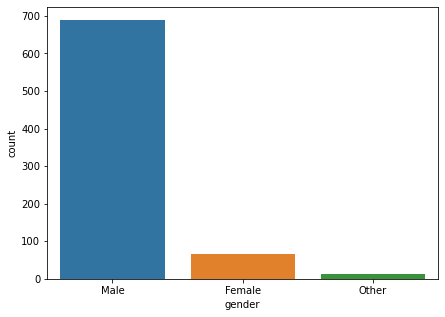

In [16]:
#b) gender
plt.figure(figsize=(7,5))
ax=sns.countplot(data_df.gender)

plt.xticks(rotation=0)

In [ ]:
#The number of male candidates who applied for the job is the highest.

In [17]:
data_df['gender'].isnull().sum()

231

In [19]:
data_df["gender"].fillna("Male", inplace = True)
sex = pd.get_dummies(data_df['gender'])
data_df.drop(['gender'],axis=1,inplace=True)
data_df = pd.concat([data_df,sex],axis=1)
data_df.drop(['Other'],axis=1,inplace=True) 

C:\Users\janar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


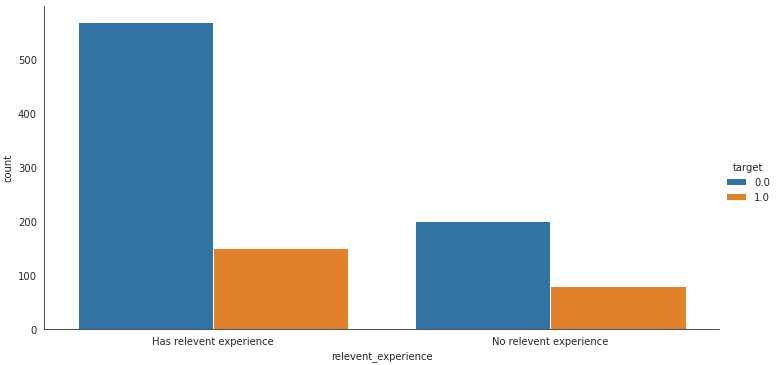

In [21]:
#c)relevant_experience
with sns.axes_style('white'):
    rel_exp = sns.factorplot("relevent_experience", data=data_df, aspect=2.0, kind='count',
                       hue='target')

In [ ]:
#Here, from the above chart, we can analyse that candidates who are having relevant experience in the concerned field are less likely to switch their job in comparison to the others who have no relevant experience.

In [22]:
#d) enrolled_university
data_df["enrolled_university"].value_counts()

no_enrollment       730
Full time course    191
Part time course     52
Name: enrolled_university, dtype: int64

In [23]:
data_df["enrolled_university"].fillna("no_enrollment", inplace = True)
enrol_uni = pd.get_dummies(data_df['enrolled_university'])
data_df.drop(['enrolled_university'],axis=1,inplace=True)
data_df = pd.concat([data_df,enrol_uni],axis=1)
data_df.drop(['Part time course'],axis=1,inplace=True) 

C:\Users\janar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


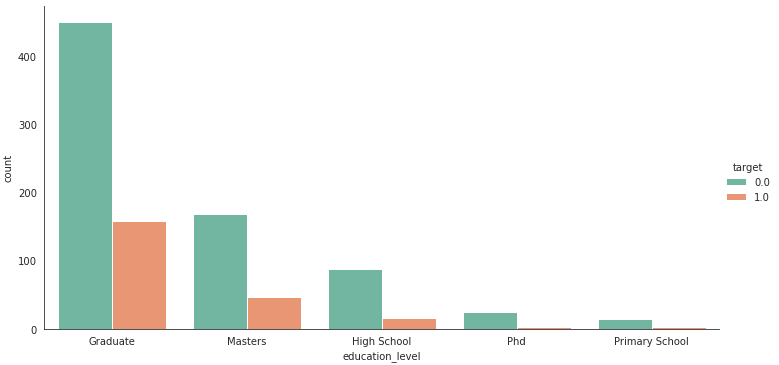

In [24]:
#e) education_level
with sns.axes_style('white'):
    rel_exp = sns.factorplot("education_level", data=data_df, aspect=2.0, kind='count',
                       hue='target',palette = 'Set2')

In [ ]:
#Most of the candidates are having graduation as their highest qualificatiojn followed by masters, and very few candidates are having Phd as their qualification.

In [26]:
data_df["education_level"].fillna("Graduate", inplace = True)
edu_level = pd.get_dummies(data_df['education_level'])
data_df.drop(['education_level'],axis=1,inplace=True)
data_df = pd.concat([data_df,edu_level],axis=1)

data_df.drop(['Phd','Primary School'],axis=1,inplace=True)

C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'Arts'),
  Text(3, 0, 'Humanities'),
  Text(4, 0, 'No Major'),
  Text(5, 0, 'Other')])

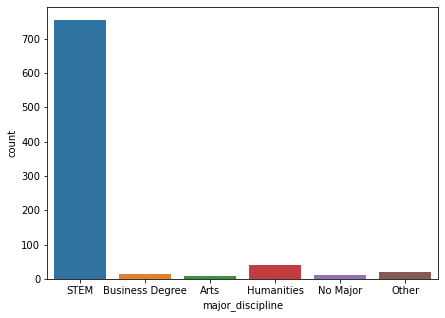

In [27]:
#f) major_discipline
plt.figure(figsize=(7,5))
ax=sns.countplot(data_df.major_discipline)
plt.xticks(rotation=0)

In [ ]:
#Majority of the candidates are from STEM.

In [28]:
data_df["major_discipline"].fillna("STEM", inplace = True)
m_disci = pd.get_dummies(data_df['major_discipline'])
data_df.drop(['major_discipline'],axis=1,inplace=True)
data_df= pd.concat([data_df,m_disci],axis=1)

data_df.drop(['Business Degree','Arts','Humanities','No Major','Other'],axis=1,inplace=True)

In [29]:
#g) experience
data_df["experience"].value_counts()

>20    177
4       85
5       73
9       73
3       70
2       67
6       60
7       50
10      49
8       43
15      39
11      33
14      29
12      29
1       23
<1      21
13      20
16      16
17      13
18      13
20       8
19       7
Name: experience, dtype: int64

In [30]:
data_df["experience"].fillna("20", inplace = True)
data_df.replace({"experience":{">20":20,"<1":1}},inplace = True)

In [32]:
data_df["experience"]= data_df["experience"].astype("int64")

C:\Users\janar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


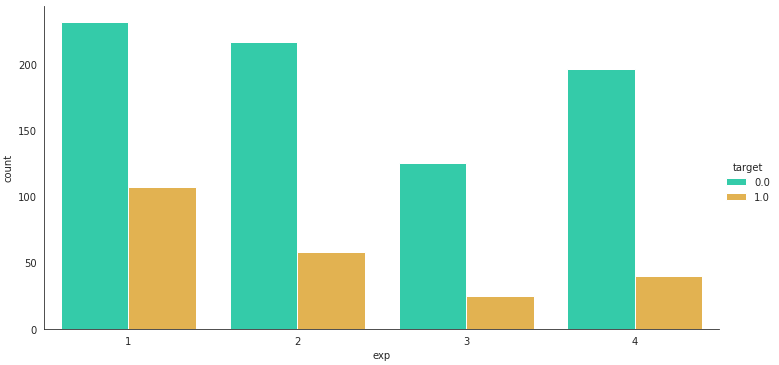

In [33]:
def exp(x):
    if  (x['experience'])  >= 1 and (x['experience'])  <= 5 :
        return 1
    elif  (x['experience'])  >= 6 and (x['experience'])  <= 10 :
        return 2
    elif  (x['experience'])  >= 11 and (x['experience'])  <= 15 :
        return 3
    else :
        return 4

data_df['exp'] = data_df.apply(exp, axis = 1)

with sns.axes_style('white'):
    rel_exp = sns.factorplot("exp", data=data_df, aspect=2.0, kind='count',
                       hue='target',palette = 'turbo')

In [ ]:
#According to the analysis, those who are having less experience are more vulnerable to switch their job, rather than those who are having more experience.

In [34]:
data_df.drop(['experience'],axis=1,inplace=True)
data_df.drop(['exp'],axis=1,inplace=True)

In [35]:
#h) company_type
data_df["company_type"].value_counts()

Pvt Ltd                517
Public Sector           53
Funded Startup          48
NGO                     37
Early Stage Startup     32
Other                    3
Name: company_type, dtype: int64

C:\Users\janar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


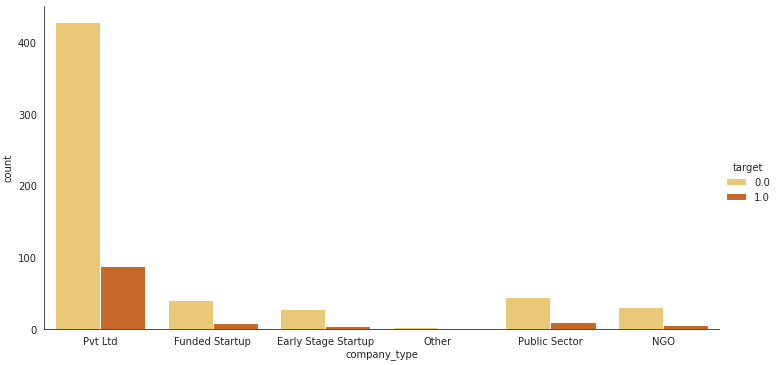

In [36]:
with sns.axes_style('white'):
    c_type = sns.factorplot("company_type", data=data_df, aspect=2.0, kind='count',
                       hue='target',palette = 'YlOrBr')

In [ ]:
#People who are working in private companies have lesser possibility of changing their job.

In [37]:
data_df["company_type"].fillna("Pvt Ltd", inplace = True)
c_type = pd.get_dummies(data_df['company_type'])
data_df.drop(['company_type'],axis=1,inplace=True)
data_df = pd.concat([data_df,c_type],axis=1)

data_df.drop(['Funded Startup','Early Stage Startup','NGO','Other'],axis=1,inplace=True)

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

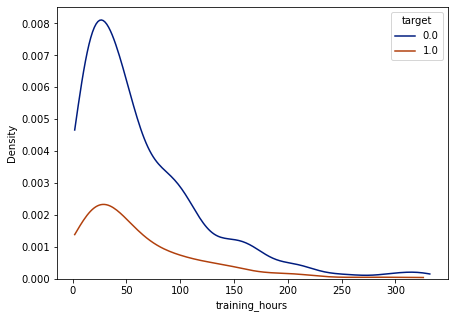

In [38]:
#i) training_hours
plt.figure(figsize=(7,5))
sns.kdeplot(data=data_df, x="training_hours",hue='target',cut=0,palette='dark')

In [ ]:
#From this graph, we can observe that employees with less training hours had a decreased likelihood of changing employment.

In [39]:
#Data after treatment of missing values and encoding
data_df.head()

,city_development_index,relevent_experience,training_hours,target,Female,Male,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,Has relevent experience,36,1.0,0,1,0,1,1,0,0,1,0,1
1,0.776,No relevent experience,47,0.0,0,1,0,1,1,0,0,1,0,1
2,0.624,No relevent experience,83,0.0,0,1,1,0,1,0,0,1,0,1
3,0.789,No relevent experience,52,1.0,0,1,0,1,1,0,0,0,0,1
4,0.767,Has relevent experience,8,0.0,0,1,0,1,0,0,1,1,0,0


In [40]:
data_df.isnull().sum()

city_development_index    0
relevent_experience       0
training_hours            0
target                    0
Female                    0
Male                      0
Full time course          0
no_enrollment             0
Graduate                  0
High School               0
Masters                   0
STEM                      0
Public Sector             0
Pvt Ltd                   0
dtype: int64

In [44]:
#Rescaling the training_hours
from sklearn.preprocessing import MinMaxScaler
data_df.training_hours = MinMaxScaler().fit_transform(np.array(data_df.training_hours).reshape(-1,1))

In [45]:
data_df.head()

,city_development_index,relevent_experience,training_hours,target,Female,Male,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,Has relevent experience,0.103030,1.0,0,1,0,1,1,0,0,1,0,1
1,0.776,No relevent experience,0.136364,0.0,0,1,0,1,1,0,0,1,0,1
2,0.624,No relevent experience,0.245455,0.0,0,1,1,0,1,0,0,1,0,1
3,0.789,No relevent experience,0.151515,1.0,0,1,0,1,1,0,0,0,0,1
4,0.767,Has relevent experience,0.018182,0.0,0,1,0,1,0,0,1,1,0,0


In [46]:
data_df.shape

(1000, 14)

In [47]:
#Imbalanced data
data_df['target'].value_counts()

0.0    770
1.0    230
Name: target, dtype: int64

C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

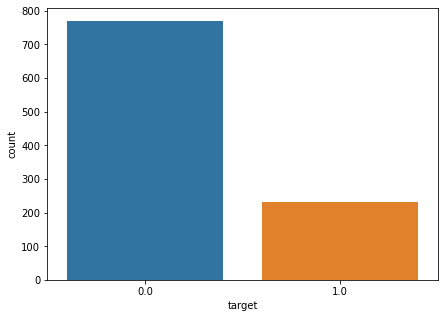

In [48]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data_df.target)
plt.xticks(rotation=0)

In [ ]:
#Here it is clearly visible that the data is highly imbalanced. In order to train the model properly, we need to balance and for the same we use SMOTE (Synthetic Minority Oversampling Technique) to balance the data.